In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\LEN\Downloads\ElectricityProduction.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [5]:
data=data.set_index(['DATE'])

In [6]:
data.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151


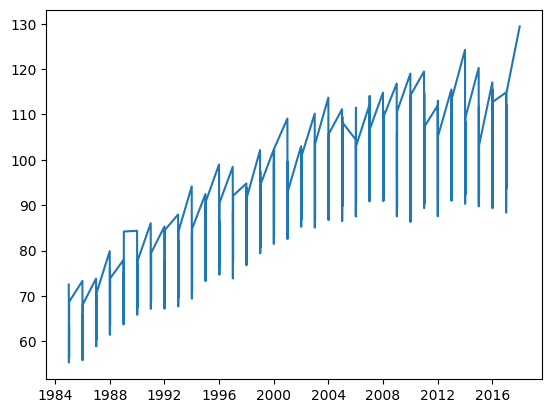

In [7]:
plt.plot(data)

In [8]:
r_m=data.rolling(window=12).mean()
r_s=data.rolling(window=12).std()

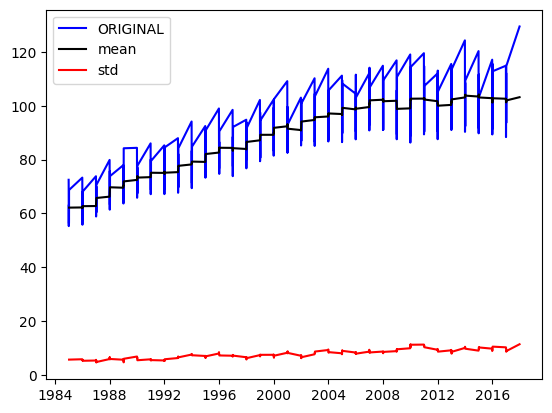

In [9]:
plt.plot(data,color="Blue",label='ORIGINAL')
plt.plot(r_m,color="Black",label='mean')
plt.plot(r_s,color="red",label='std')
plt.legend(loc='best')

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(data)

(-2.2569903500472455,
 0.18621469116586759,
 15,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1840.8474501627156)

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

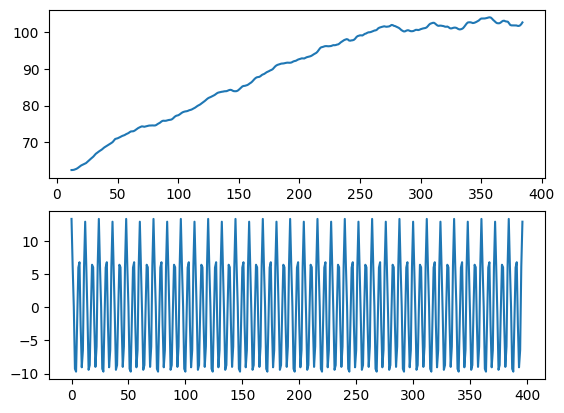

In [13]:
decompose=seasonal_decompose(data.iloc[-2000:].values,model='Additive',period=24)
trend=decompose.trend
season=decompose.seasonal
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [14]:
data_s=data["IPG2211A2N"]-data["IPG2211A2N"].shift(2)
data_s=data_s.dropna()

In [15]:
adfuller(data_s)

(-7.197851221034593,
 2.408360962361176e-10,
 13,
 381,
 {'1%': -3.4476305904172904,
  '5%': -2.869155980820355,
  '10%': -2.570827146203181},
 1838.7757071928977)

In [16]:
from statsmodels.tsa.stattools import acf,pacf

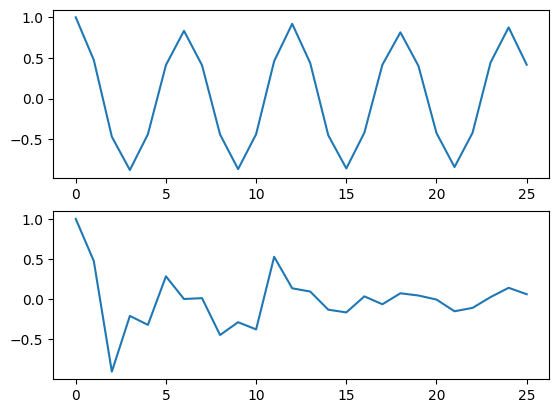

In [17]:
a=acf(data_s)
p=pacf(data_s)
plt.subplot(211)
plt.plot(a)
plt.subplot(212)
plt.plot(p)

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
model=ARIMA(data_s,seasonal_order=(3,2,2,12))
model_fit=model.fit()
r=model_fit.forecast(24)


C:\Users\LEN\miniconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LEN\miniconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LEN\miniconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LEN\miniconda3\envs\py37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

In [24]:
r=pd.DataFrame(r)
r.columns=["IPG2211A2N"]
data_final=pd.DataFrame(data)
data_final=data_final.append(r)

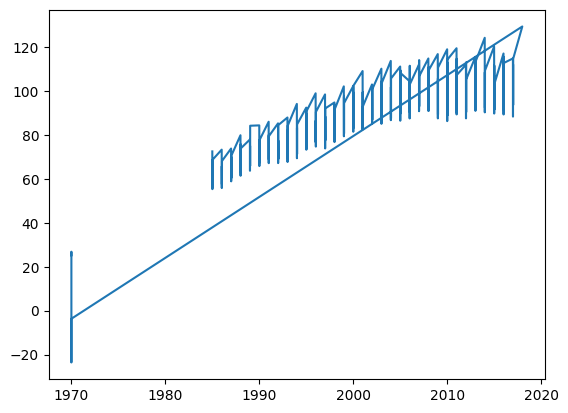

In [25]:
plt.plot(data_final)